In [40]:
# LogisticRegression, DecisionTreeClassifier, SVC 사용 => Voting방식으로 진행 
# Voting : 동일한 데이터셋으로 3개의 모델로 학습 진행
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer

x,y=load_breast_cancer(as_frame=True, return_X_y=True)
x.shape, y.shape

((569, 30), (569,))

In [41]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=5, stratify=y)

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC 

lr_model=LogisticRegression(solver="liblinear")
lr_model.fit(x_train,y_train)
dt_model=DecisionTreeClassifier()
dt_model.fit(x_train,y_train)
svc_model=SVC()
svc_model.fit(x_train,y_train)

SVC()

In [43]:
# 3개 알고리즘 모델에 대한 성능 평가
print(f'[LogisticRegression] 학습 데이터 점수: {lr_model.score(x_train,y_train)}, 테스트 데이터 점수: {lr_model.score(x_test,y_test)}')
print(f'[DecisionTree] 학습 데이터 점수: {dt_model.score(x_train,y_train)}, 테스트 데이터 점수: {dt_model.score(x_test,y_test)}')
print(f'[SVM] 학습 데이터 점수: {svc_model.score(x_train,y_train)}, 테스트 데이터 점수: {svc_model.score(x_test,y_test)}')

[LogisticRegression] 학습 데이터 점수: 0.9560439560439561, 테스트 데이터 점수: 0.9649122807017544
[DecisionTree] 학습 데이터 점수: 1.0, 테스트 데이터 점수: 0.9210526315789473
[SVM] 학습 데이터 점수: 0.9164835164835164, 테스트 데이터 점수: 0.8771929824561403


In [44]:
from sklearn.ensemble import VotingClassifier

# VotingClassifier 생성
voting_model=VotingClassifier(estimators=[('lr',lr_model),('dt',dt_model),('svc',svc_model)], voting='hard', verbose=True)
voting_model.fit(x_train,y_train)
voting_model.score(x_train,y_train), voting_model.score(x_test,y_test)

[Voting] ....................... (1 of 3) Processing lr, total=   0.0s
[Voting] ....................... (2 of 3) Processing dt, total=   0.0s
[Voting] ...................... (3 of 3) Processing svc, total=   0.0s


(0.967032967032967, 0.9385964912280702)

In [45]:
voting_model.named_estimators_['lr'] # 이름으로 할당한 모델에 접근

LogisticRegression(solver='liblinear')

In [46]:
voting_model.le_

LabelEncoder()

In [47]:
# 예측하기
voting_model.predict(x_test)

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1])

In [48]:
voting_model.predict(pd.DataFrame([x_test.iloc[0]], columns=x_test.columns))
# pd.DataFrame([x_test.iloc[0]], columns=x_test.columns)
# x_test.iloc[0].to_frame().T 

array([1])

In [49]:
voting_model.named_estimators

{'lr': LogisticRegression(solver='liblinear'),
 'dt': DecisionTreeClassifier(),
 'svc': SVC()}

In [51]:
for key, value in voting_model.named_estimators_.items():
    print(key, value.predict(x_test.iloc[0].to_frame().T ))

lr [1]
dt [1]
svc [1]


In [60]:
from sklearn.ensemble import RandomForestClassifier

model=RandomForestClassifier(oob_score=True)
model.fit(x_train, y_train)
result=pd.Series(dict(zip(model.feature_names_in_,model.feature_importances_))).sort_values(ascending=False) # 랜덤 포레스트에서 제공하는 주요 피처 기능들 
result

worst perimeter            0.139198
worst area                 0.125046
mean concave points        0.124763
worst radius               0.095624
worst concave points       0.088860
mean radius                0.063684
mean area                  0.056613
mean perimeter             0.049649
mean concavity             0.040576
worst concavity            0.033294
area error                 0.022408
mean texture               0.019649
worst texture              0.017609
perimeter error            0.014974
worst smoothness           0.012673
worst fractal dimension    0.011992
radius error               0.009822
mean compactness           0.009270
worst symmetry             0.009143
worst compactness          0.007721
fractal dimension error    0.006988
concavity error            0.006904
smoothness error           0.006270
concave points error       0.005713
mean smoothness            0.004869
mean fractal dimension     0.004346
compactness error          0.003609
texture error              0

<Axes: >

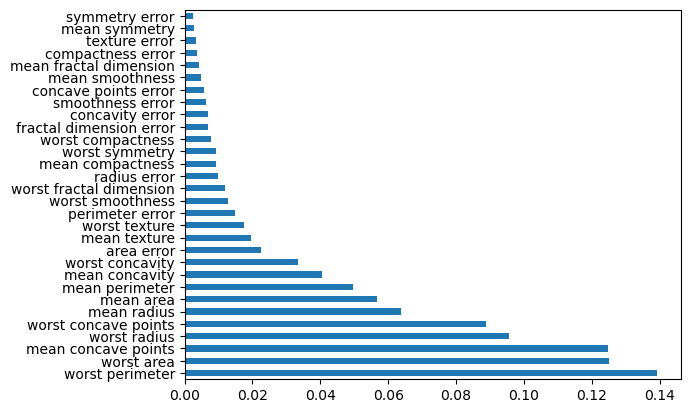

In [61]:
result.plot(kind='barh')

In [62]:
import xgboost